In [84]:
!pip install fast_ml

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fast_ml.outlier_treatment import OutlierTreatment
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [86]:
data = pd.read_csv('/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv')

In [87]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [88]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [89]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [90]:
data['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [91]:
data['Month']=data['Month'].map({'Feb':2,'Mar':3,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})

In [92]:
data['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [93]:
data['VisitorType']=data['VisitorType'].map({'Returning_Visitor':0, 'New_Visitor':1, 'Other':2})

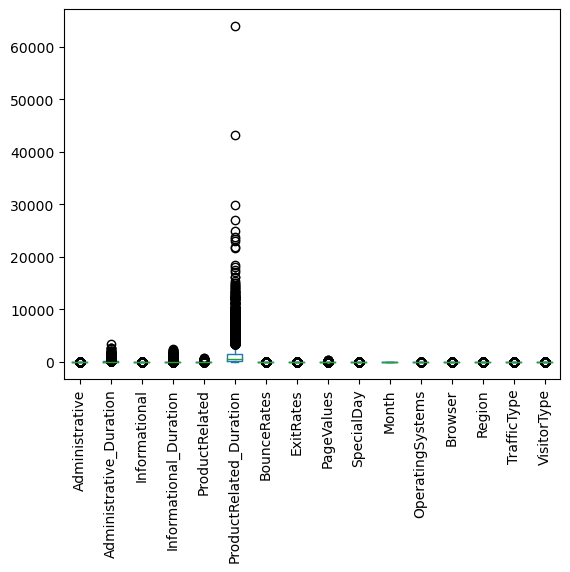

<Figure size 1200x1200 with 0 Axes>

In [94]:
data.plot(kind='box')
plt.xticks(rotation=90)
plt.figure(figsize=(12,12))
plt.show()

<AxesSubplot:>

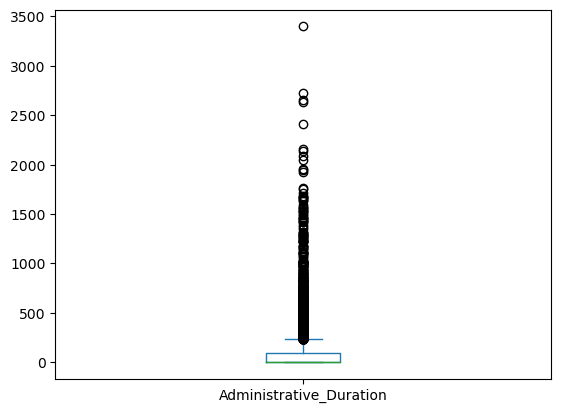

In [95]:
data['Administrative_Duration'].plot(kind='box')

<AxesSubplot:>

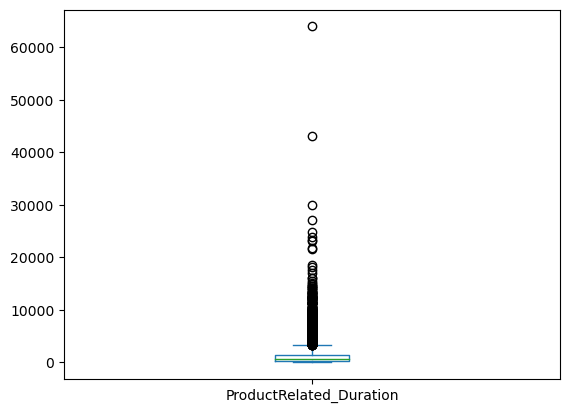

In [96]:
data['ProductRelated_Duration'].plot(kind='box')

<AxesSubplot:>

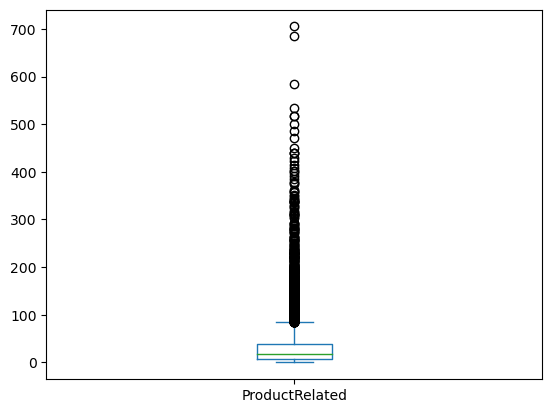

In [97]:
data['ProductRelated'].plot(kind='box')

In [98]:
ot = OutlierTreatment()
ot.fit(data,['Administrative_Duration','ProductRelated_Duration','ProductRelated'])
data = ot.transform(data)

<AxesSubplot:>

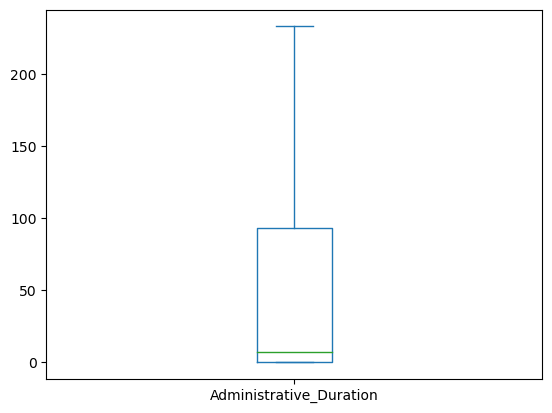

In [99]:
data['Administrative_Duration'].plot(kind='box')

<AxesSubplot:>

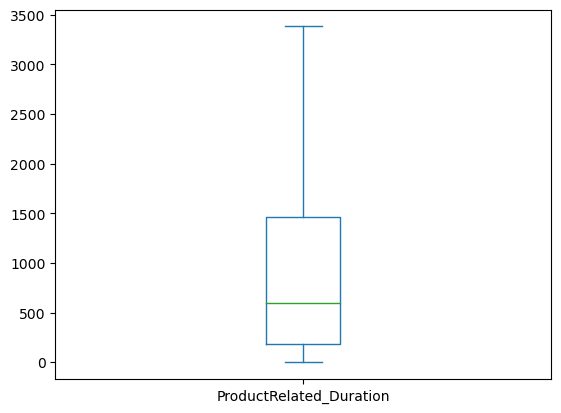

In [100]:
data['ProductRelated_Duration'].plot(kind='box')

<AxesSubplot:>

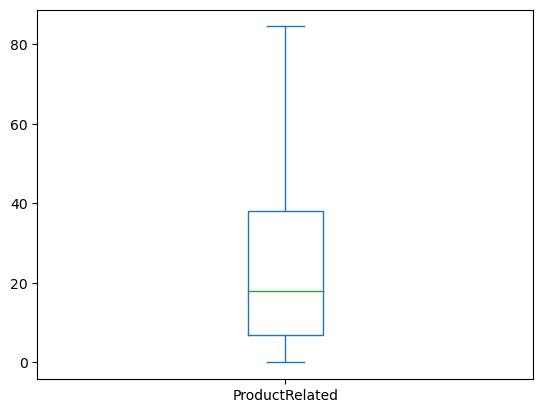

In [101]:
data['ProductRelated'].plot(kind='box')

In [102]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,56.972776,0.503569,34.472398,26.696229,989.691454,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,0.151176
std,3.321784,79.250727,1.270156,140.749294,25.155967,1033.120180,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.376989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,233.140625,24.000000,2549.375000,84.500000,3384.186784,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,2.000000


<AxesSubplot:>

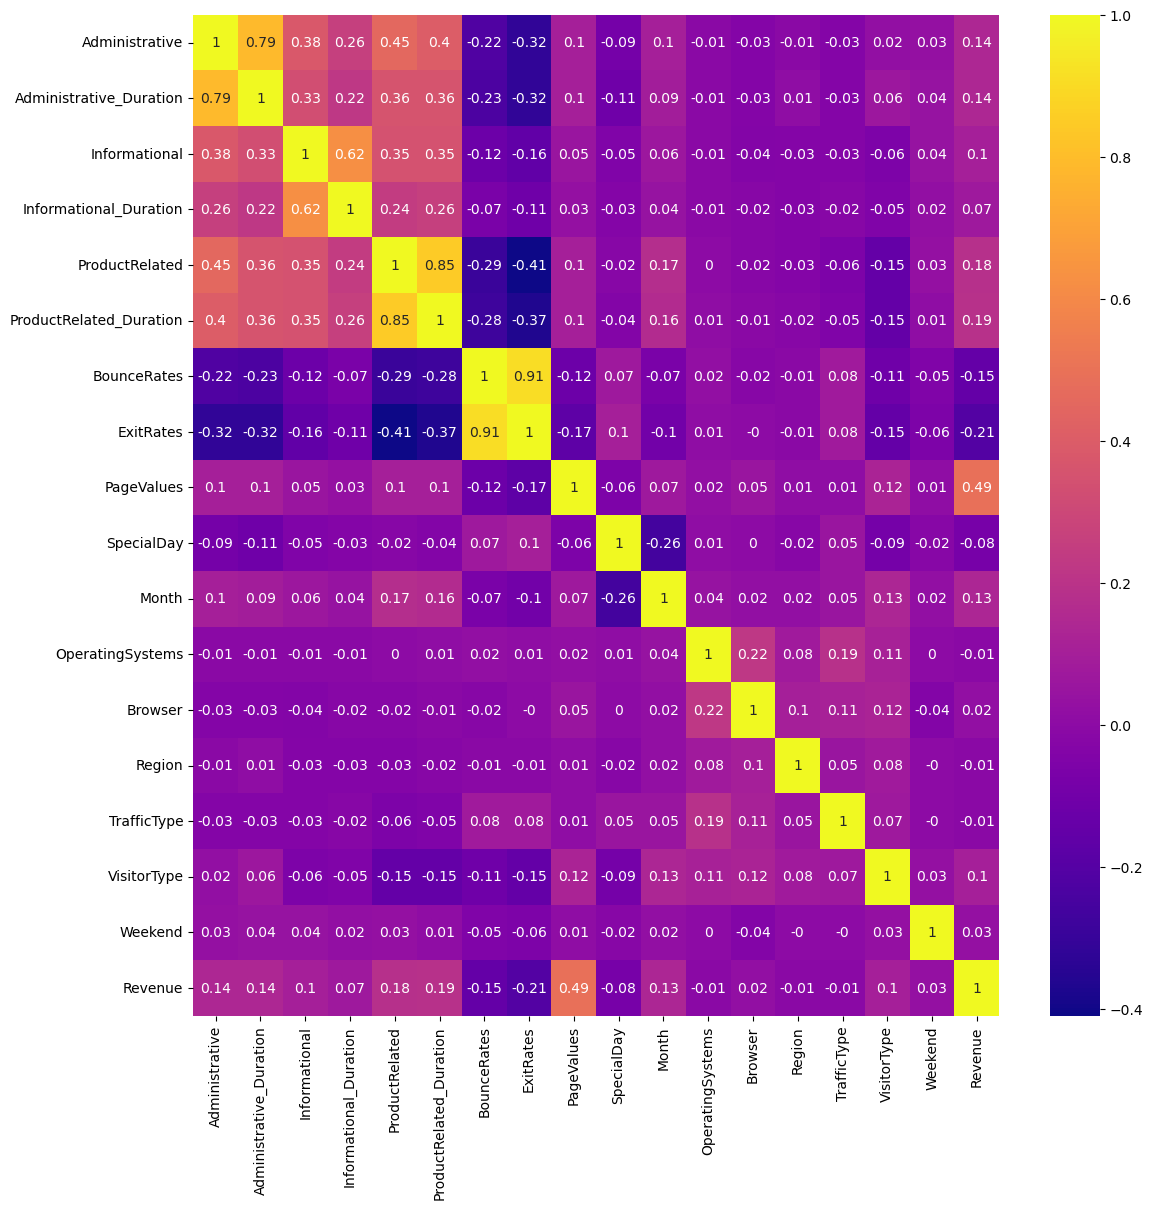

In [103]:
correlation = data.corr().round(2)
plt.figure(figsize=(13,13))
sns.heatmap(correlation,cmap='plasma',annot=True)

In [104]:
data['Weekend']=data['Weekend'].map({False: 1,True: 0})
data['Revenue']=data['Revenue'].map({False: 0,True: 1})

In [105]:
x1 = data.drop('Revenue',axis=1)
y1 = data['Revenue']

In [106]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
Revenue                      int64
dtype: object

In [107]:
x1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,0,1
1,0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,0,1
2,0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,0,1
3,0,0.0,0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,0,1
4,0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,0,0
12326,0,0.0,0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,0,0
12327,0,0.0,0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,0,0
12328,4,75.0,0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,0,1


In [108]:
y1

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12330, dtype: int64

In [109]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=0)

In [110]:
x_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
2509,0,0.000000,0,0.0,16.0,534.916667,0.000000,0.021250,0.000000,0.0,5,2,2,7,3,0,1
11116,7,170.500000,3,161.5,84.5,3384.186784,0.003602,0.018762,0.000000,0.0,12,2,10,1,2,0,1
7292,5,91.000000,2,232.8,84.5,3384.186784,0.006426,0.024960,0.000000,0.0,10,4,1,4,3,0,0
7394,6,90.600000,0,0.0,10.0,384.800000,0.000000,0.015385,0.000000,0.0,8,1,2,3,2,1,0
4946,0,0.000000,1,38.0,10.0,311.000000,0.018182,0.036364,0.000000,0.0,5,2,10,2,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,1,4.000000,0,0.0,50.0,549.916667,0.000000,0.008163,0.000000,0.0,5,4,1,1,4,0,1
3264,0,0.000000,0,0.0,5.0,691.000000,0.000000,0.080000,0.000000,0.6,5,2,2,2,3,0,1
9845,13,233.140625,5,128.0,84.5,3384.186784,0.001905,0.013669,3.651726,0.0,11,2,2,3,10,0,0
10799,0,0.000000,0,0.0,23.0,338.583333,0.000000,0.008696,0.000000,0.0,11,3,2,1,10,0,1


In [111]:
x_test

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
12245,0,0.000000,0,0.00,74.0,3109.404167,0.009459,0.042859,0.000000,0.0,11,2,2,1,2,0,1
9704,16,180.666667,1,649.25,84.5,3384.186784,0.007937,0.026808,0.000000,0.0,12,2,6,7,1,0,1
9177,9,186.673077,0,0.00,73.0,1606.308250,0.010295,0.019109,0.000000,0.0,11,3,2,8,2,0,0
8848,0,0.000000,0,0.00,2.0,0.000000,0.200000,0.200000,0.000000,0.0,11,3,2,5,20,0,1
2768,0,0.000000,0,0.00,1.0,0.000000,0.200000,0.200000,0.000000,1.0,5,4,1,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9606,2,36.750000,2,9.00,20.0,393.583333,0.008333,0.033873,0.000000,0.0,11,1,1,3,6,0,1
9095,3,116.500000,0,0.00,15.0,320.250000,0.000000,0.005882,0.000000,0.0,12,1,1,4,6,0,0
3172,6,233.140625,2,900.50,24.0,1448.333333,0.000000,0.003846,0.000000,0.0,5,2,4,4,2,1,0
8009,1,65.500000,1,38.50,84.5,3384.186784,0.008889,0.022870,0.000000,0.0,11,3,2,3,1,0,1


In [112]:
y_train

2509     0
11116    0
7292     0
7394     0
4946     0
        ..
4859     0
3264     0
9845     1
10799    0
2732     0
Name: Revenue, Length: 9864, dtype: int64

In [113]:
y_test

12245    0
9704     0
9177     0
8848     0
2768     0
        ..
9606     0
9095     0
3172     0
8009     0
1672     1
Name: Revenue, Length: 2466, dtype: int64

In [114]:
dt = DecisionTreeClassifier()

In [115]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [116]:
pred = dt.predict(x_test)

In [117]:
acc = accuracy_score(pred,y_test)
print(acc)

0.8548256285482563


**ACCURACY**

Therefore the accuracy of the model is 85%

In [118]:
std = StandardScaler()

In [119]:
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)

In [120]:
dt1 = DecisionTreeClassifier()

In [121]:
dt1.fit(x_train_std,y_train)

DecisionTreeClassifier()

In [122]:
pred1 = dt1.predict(x_test_std)

In [123]:
acc1 = accuracy_score(pred1,y_test)
print(acc1)

0.85117599351176


Even we try to standardize the data , the result is approximately same